In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df = pd.read_csv('yulu.csv')

In [3]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
#shape of the data
df.shape

(10886, 12)

In [5]:
#getting the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB




1.   There are 10886 rows and 12 columns in the data
2.   The datetime column has object datatype, but it should has datetime data type
3. season, holiday, workingday, weather should be converted into categorical data type as it has categories associated with it.



In [6]:
#check if their is null in any columns
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


Insights:

1. None of the column contains any null values

In [7]:
#duplicate check
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


The data doesn't contain any duplicate rows

In [8]:
#renaming count column to total riders
df.rename(columns = {'count' : 'total_riders'}, inplace = True)

In [9]:
#converting the data type of datetime column to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

The dataset duration ranges from January 1, 2011 till 19 December 2012

In [11]:
df['datetime'].dtype

dtype('<M8[ns]')

In [12]:
#creating new columns from datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day_name()
df['month'] = df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [13]:
#general statistical data
df.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
datetime,10886,NaN,NaN,NaN,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
season,10886.0,NaN,NaN,NaN,2.506614,1.0,2.0,3.0,4.0,4.0,1.116174
holiday,10886.0,NaN,NaN,NaN,0.028569,0.0,0.0,0.0,0.0,1.0,0.166599
workingday,10886.0,NaN,NaN,NaN,0.680875,0.0,0.0,1.0,1.0,1.0,0.466159
weather,10886.0,NaN,NaN,NaN,1.418427,1.0,1.0,1.0,2.0,4.0,0.633839
temp,10886.0,NaN,NaN,NaN,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,NaN,NaN,NaN,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,NaN,NaN,NaN,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,NaN,NaN,NaN,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,NaN,NaN,NaN,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477


In [14]:
#Changing the data type of 2nd column - 4th column from object to category
for i in df.columns[1:5]:
  df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_riders  10886 non-null  int64         
 12  year          10886 non-null  int32         
 13  month         10886 non-null  object        
 14  hour          10886 non-null  int32         
 15  day           10886 non-null  object

In [15]:
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [16]:
#mapping the data
df['season'] = df['season'].map(str)
season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
df["season"] = df["season"].map(lambda x: season_mapping[x])

df['holiday']= df['holiday'].map(str)
holiday_mapping = {'0':'no', '1':'yes'}
df["holiday"] = df["holiday"].map(lambda x: holiday_mapping[x])

df['workingday']= df['workingday'].map(str)
working_day_mapping = {'0':'no', '1':'yes'}
df["workingday"] = df["workingday"].map(lambda x: working_day_mapping[x])

df['weather']= df['weather'].map(str)
weather_mapping = {'1':'clear', '2':'partly_cloudy', '3':'rain', '4':'heavy rain'}
df["weather"] = df["weather"].map(lambda x: weather_mapping[x])

In [17]:
df.sample(6)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,month,hour,day
1361,2011-04-02 14:00:00,summer,no,no,rain,13.12,15.150,76,22.0028,97,93,190,2011,April,14,Saturday
389,2011-01-17 17:00:00,spring,yes,no,clear,8.20,9.850,51,12.9980,4,67,71,2011,January,17,Monday
1873,2011-05-04 23:00:00,summer,no,yes,clear,14.76,17.425,62,15.0013,8,49,57,2011,May,23,Wednesday
7433,2012-05-09 02:00:00,summer,no,yes,rain,22.96,26.515,88,30.0026,0,1,1,2012,May,2,Wednesday
155,2011-01-07 18:00:00,spring,no,yes,clear,8.20,11.365,40,6.0032,7,116,123,2011,January,18,Friday
9697,2012-10-08 10:00:00,winter,yes,no,partly_cloudy,15.58,19.695,68,8.9981,69,229,298,2012,October,10,Monday


In [18]:
#unique values on the basis of columns
for i in df.columns:
  print(f'Number of Unique values in {i} are:',  df[i].nunique())
  print(f'Count of Unique Values are:')
  display(df[i].value_counts().to_frame().reset_index())
  print('\n')

Number of Unique values in datetime are: 10886
Count of Unique Values are:


,datetime,count
0,2011-01-01 00:00:00,1
1,2012-05-01 21:00:00,1
2,2012-05-01 13:00:00,1
3,2012-05-01 14:00:00,1
4,2012-05-01 15:00:00,1
...,...,...
10881,2011-09-02 04:00:00,1
10882,2011-09-02 05:00:00,1
10883,2011-09-02 06:00:00,1
10884,2011-09-02 07:00:00,1




Number of Unique values in season are: 4
Count of Unique Values are:


,season,count
0,winter,2734
1,summer,2733
2,fall,2733
3,spring,2686




Number of Unique values in holiday are: 2
Count of Unique Values are:


,holiday,count
0,no,10575
1,yes,311




Number of Unique values in workingday are: 2
Count of Unique Values are:


,workingday,count
0,yes,7412
1,no,3474




Number of Unique values in weather are: 4
Count of Unique Values are:


,weather,count
0,clear,7192
1,partly_cloudy,2834
2,rain,859
3,heavy rain,1




Number of Unique values in temp are: 49
Count of Unique Values are:


,temp,count
0,14.76,467
1,26.24,453
2,28.70,427
3,13.94,413
4,18.86,406
5,22.14,403
6,25.42,403
7,16.40,400
8,22.96,395
9,27.06,394




Number of Unique values in atemp are: 60
Count of Unique Values are:


,atemp,count
0,31.060,671
1,25.760,423
2,22.725,406
3,20.455,400
4,26.515,395
5,16.665,381
6,25.000,365
7,33.335,364
8,21.210,356
9,30.305,350




Number of Unique values in humidity are: 89
Count of Unique Values are:


,humidity,count
0,88,368
1,94,324
2,83,316
3,87,289
4,70,259
...,...,...
84,8,1
85,10,1
86,97,1
87,96,1




Number of Unique values in windspeed are: 28
Count of Unique Values are:


,windspeed,count
0,0.0000,1313
1,8.9981,1120
2,11.0014,1057
3,12.9980,1042
4,7.0015,1034
5,15.0013,961
6,6.0032,872
7,16.9979,824
8,19.0012,676
9,19.9995,492




Number of Unique values in casual are: 309
Count of Unique Values are:


,casual,count
0,0,986
1,1,667
2,2,487
3,3,438
4,4,354
...,...,...
304,332,1
305,361,1
306,356,1
307,331,1




Number of Unique values in registered are: 731
Count of Unique Values are:


,registered,count
0,3,195
1,4,190
2,5,177
3,6,155
4,2,150
...,...,...
726,570,1
727,422,1
728,678,1
729,565,1




Number of Unique values in total_riders are: 822
Count of Unique Values are:


,total_riders,count
0,5,169
1,4,149
2,3,144
3,6,135
4,2,132
...,...,...
817,801,1
818,629,1
819,825,1
820,589,1




Number of Unique values in year are: 2
Count of Unique Values are:


,year,count
0,2012,5464
1,2011,5422




Number of Unique values in month are: 12
Count of Unique Values are:


,month,count
0,May,912
1,June,912
2,July,912
3,August,912
4,December,912
5,October,911
6,November,911
7,April,909
8,September,909
9,February,901




Number of Unique values in hour are: 24
Count of Unique Values are:


,hour,count
0,12,456
1,13,456
2,22,456
3,21,456
4,20,456
5,19,456
6,18,456
7,17,456
8,16,456
9,15,456




Number of Unique values in day are: 7
Count of Unique Values are:


,day,count
0,Saturday,1584
1,Sunday,1579
2,Thursday,1553
3,Monday,1551
4,Wednesday,1551
5,Tuesday,1539
6,Friday,1529


In [19]:
#categorical variable value counts
for i in df.columns:
  if df[i].dtype == 'category':
    display(np.round(df[i].value_counts(normalize = True) * 100, 2).reset_index())
    print()

,season,proportion
0,winter,25.11
1,summer,25.11
2,fall,25.11
3,spring,24.67


,holiday,proportion
0,no,97.14
1,yes,2.86


,workingday,proportion
0,yes,68.09
1,no,31.91


,weather,proportion
0,clear,66.07
1,partly_cloudy,26.03
2,rain,7.89
3,heavy rain,0.01


##Insights:

1. There are 68% of working days in the dataset
2. Weather is mostly clear and partly cloudy and very less rain

###Univariate Analysis

####Categorical Variables

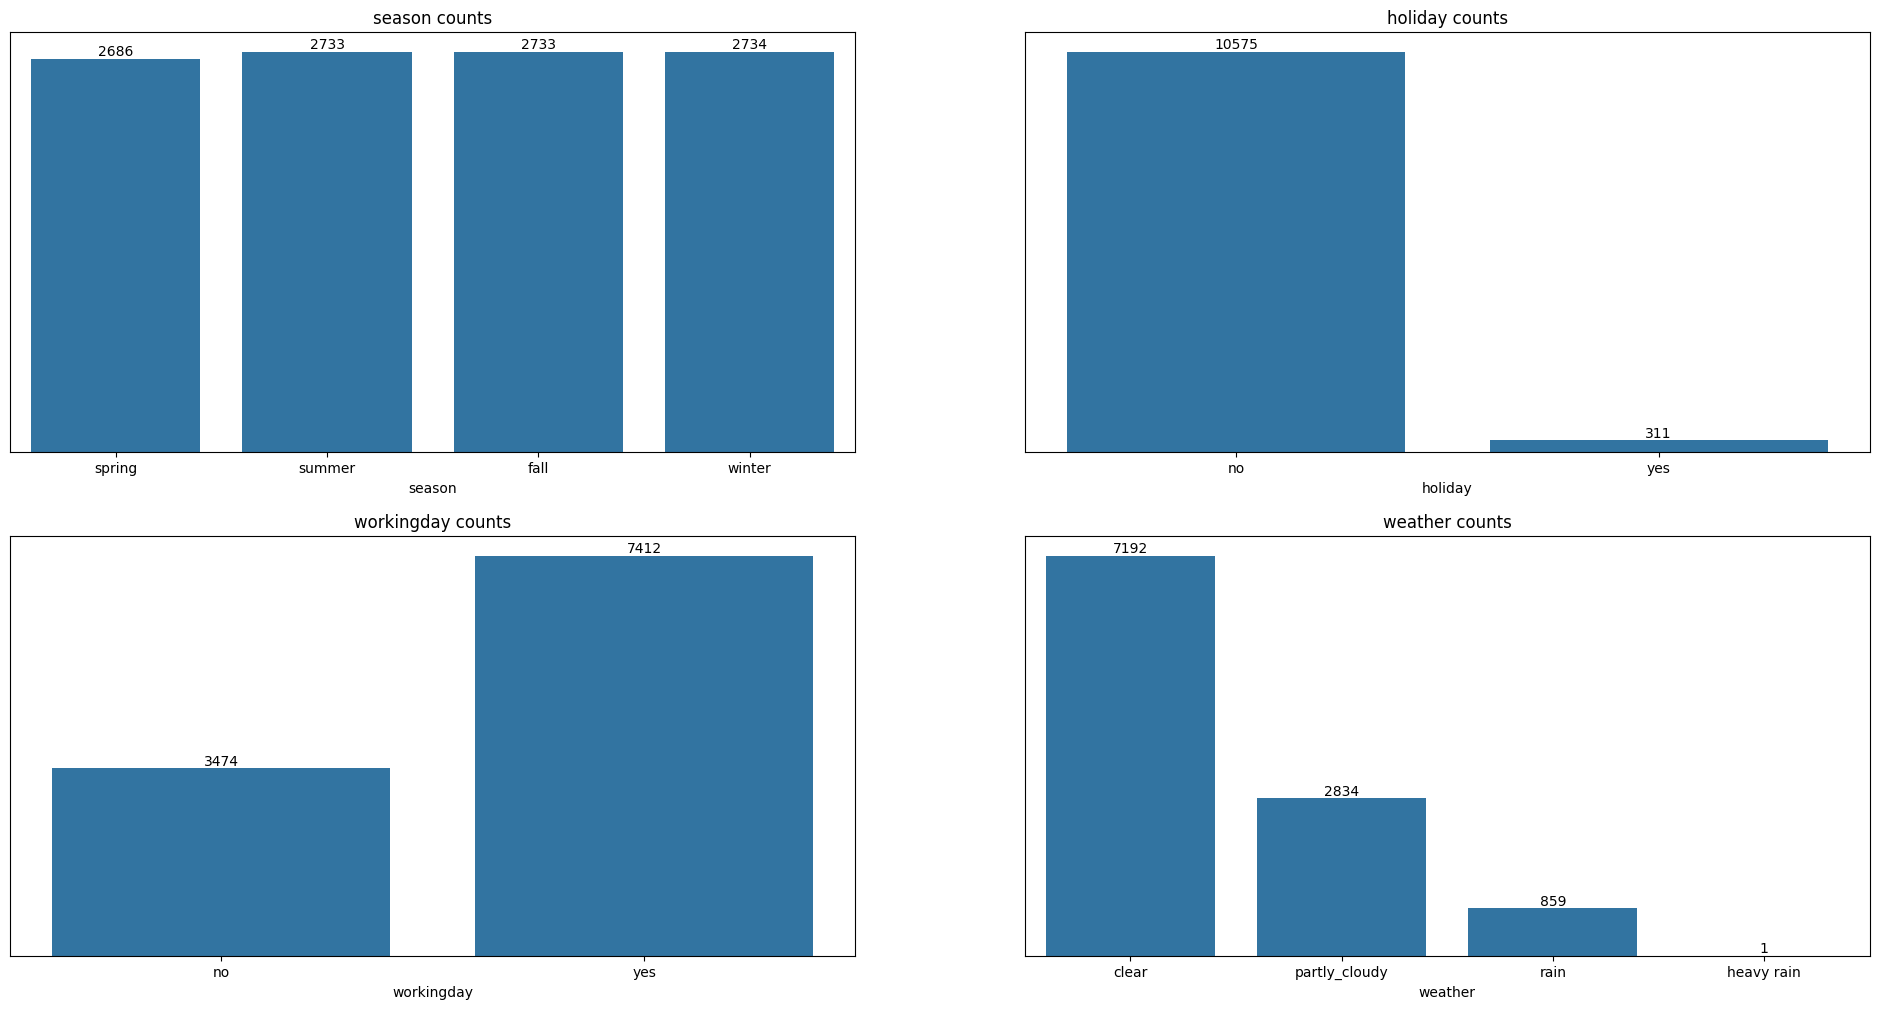

In [20]:
plt.figure(figsize = (24,12))

i = 1
for _ in df.columns:
  if df[_].dtype == 'category':
    plt.subplot(2,2,i)
    a = sns.countplot(data = df, x = df[_])
    a.bar_label(a.containers[0], label_type = 'edge')
    plt.title(f'{_} counts')
    plt.yticks([])
    plt.ylabel('')
    i+=1

Insights:
  * Yulu bikes were rented mostly in clear followed by partly cloudy, and rain condition indicating that rental bikes business is dependent on weather conditions.
  * Most of the bikes are rented on working day suggesting that there might be a large population which will be using these bikes for regular commute to the office.

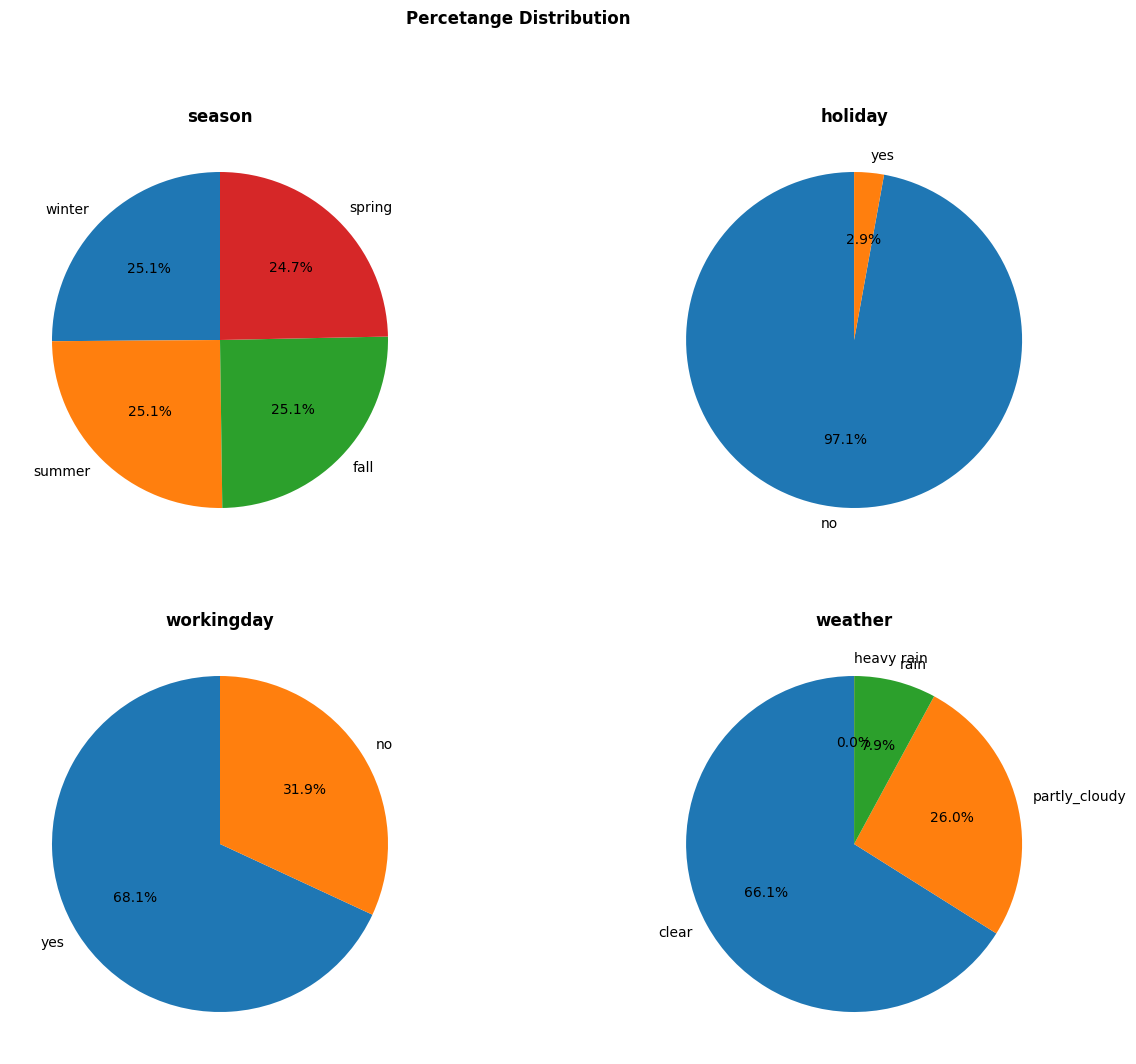

In [21]:
plt.figure(figsize = (15,12))

i = 1
for _ in df.columns:
  if df[_].dtype == 'category':
    plt.subplot(2,2,i)
    a = plt.pie(data = df, x = df[_].value_counts(), labels = df[_].value_counts().index, autopct = '%1.1f%%', startangle = 90)
    plt.title(f'{_}', fontsize = 12, fontweight = 'bold')
    plt.yticks([])
    plt.ylabel('')
    i+=1
plt.suptitle('Percetange Distribution', fontsize = 12, fontweight = 'bold')
plt.show()

Insights:
  * The working data suggests that close to 32% of the population rent bikes on a non-working day which accomodates both holidays and weekends as well.

####Numerical Variables

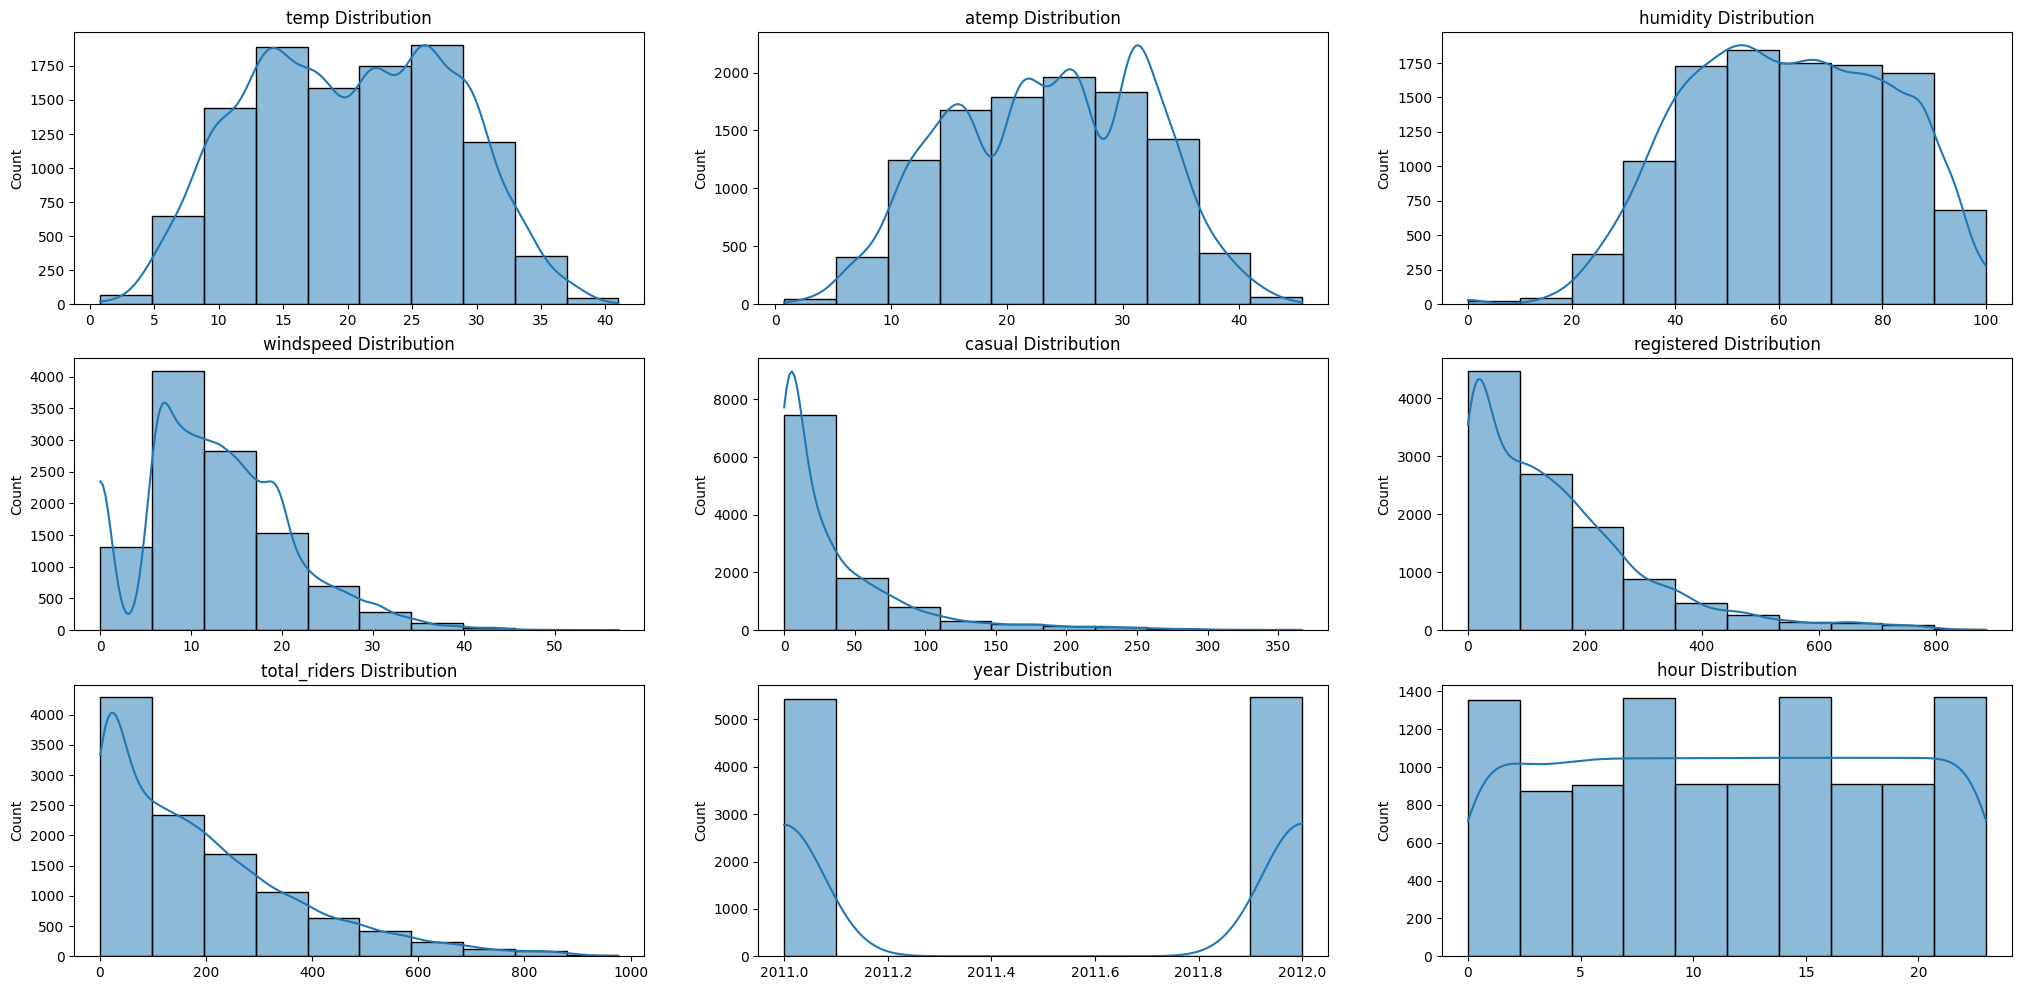

In [22]:
plt.figure(figsize = (25,12))

i = 1
for _ in df.columns:
  if pd.api.types.is_numeric_dtype(df[_]):
    plt.subplot(3, 3, i)
    a = sns.histplot(data = df, x = df[_], kde = True, bins = 10)
    plt.title(f'{_} Distribution')
    plt.xlabel('')
    i+= 1
plt.show()

Insights:
  * Skewness: Several of the distributions (casual riders, registered riders, total riders, windspeed) are right-skewed, indicating that many data points cluster towards the lower end of the scale.
  * Different Rider Types: Casual riders are generally fewer compared to registered riders, as shown by the shape of their respective distributions.
  * Normal-like Distributions: Temperature and adjusted temperature are relatively normal in shape, which is suggesting a seasonal trend.

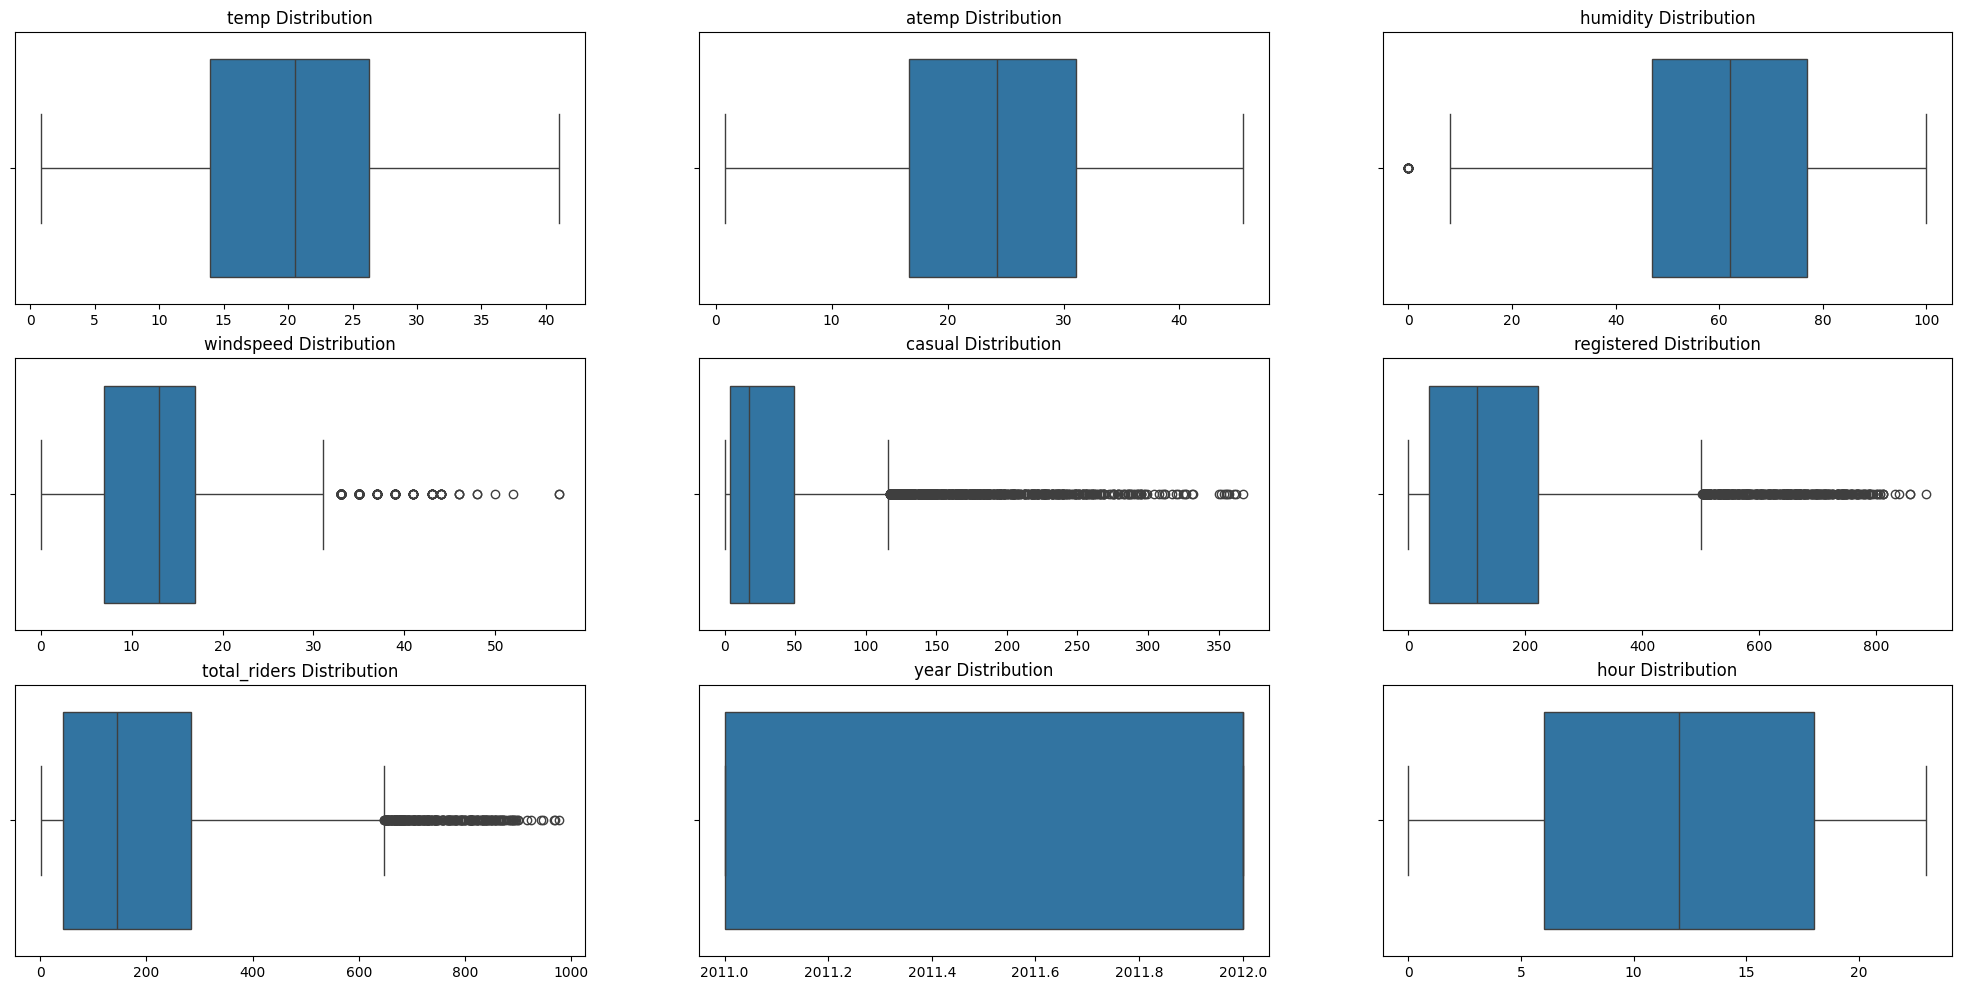

In [23]:
plt.figure(figsize = (25,12))

i = 1
for _ in df.columns:
  if pd.api.types.is_numeric_dtype(df[_]):
    plt.subplot(3, 3, i)
    a = sns.boxplot(data = df, x = df[_])
    plt.title(f'{_} Distribution')
    plt.xlabel('')
    i+= 1
plt.show()

Insights:
  * Outliers in ridership data could be due to special events, weather anomalies, or other external factors that caused unusually high ridership.
  * The presence of outliers in windspeed might suggest that higher wind speeds are rare but impactful on the system, potentially affecting ridership or operational conditions.
  * Temperature and humidity are relatively stable, with only minor outliers, indicating that extreme weather conditions are infrequent.

#Bi-Variate Analysis

In [24]:
cat_cols = []
for i in df.columns:
  if df[i].dtype == 'category':
    cat_cols.append(i)
cat_cols

['season', 'holiday', 'workingday', 'weather']

In [25]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total_riders',
 'year',
 'hour']

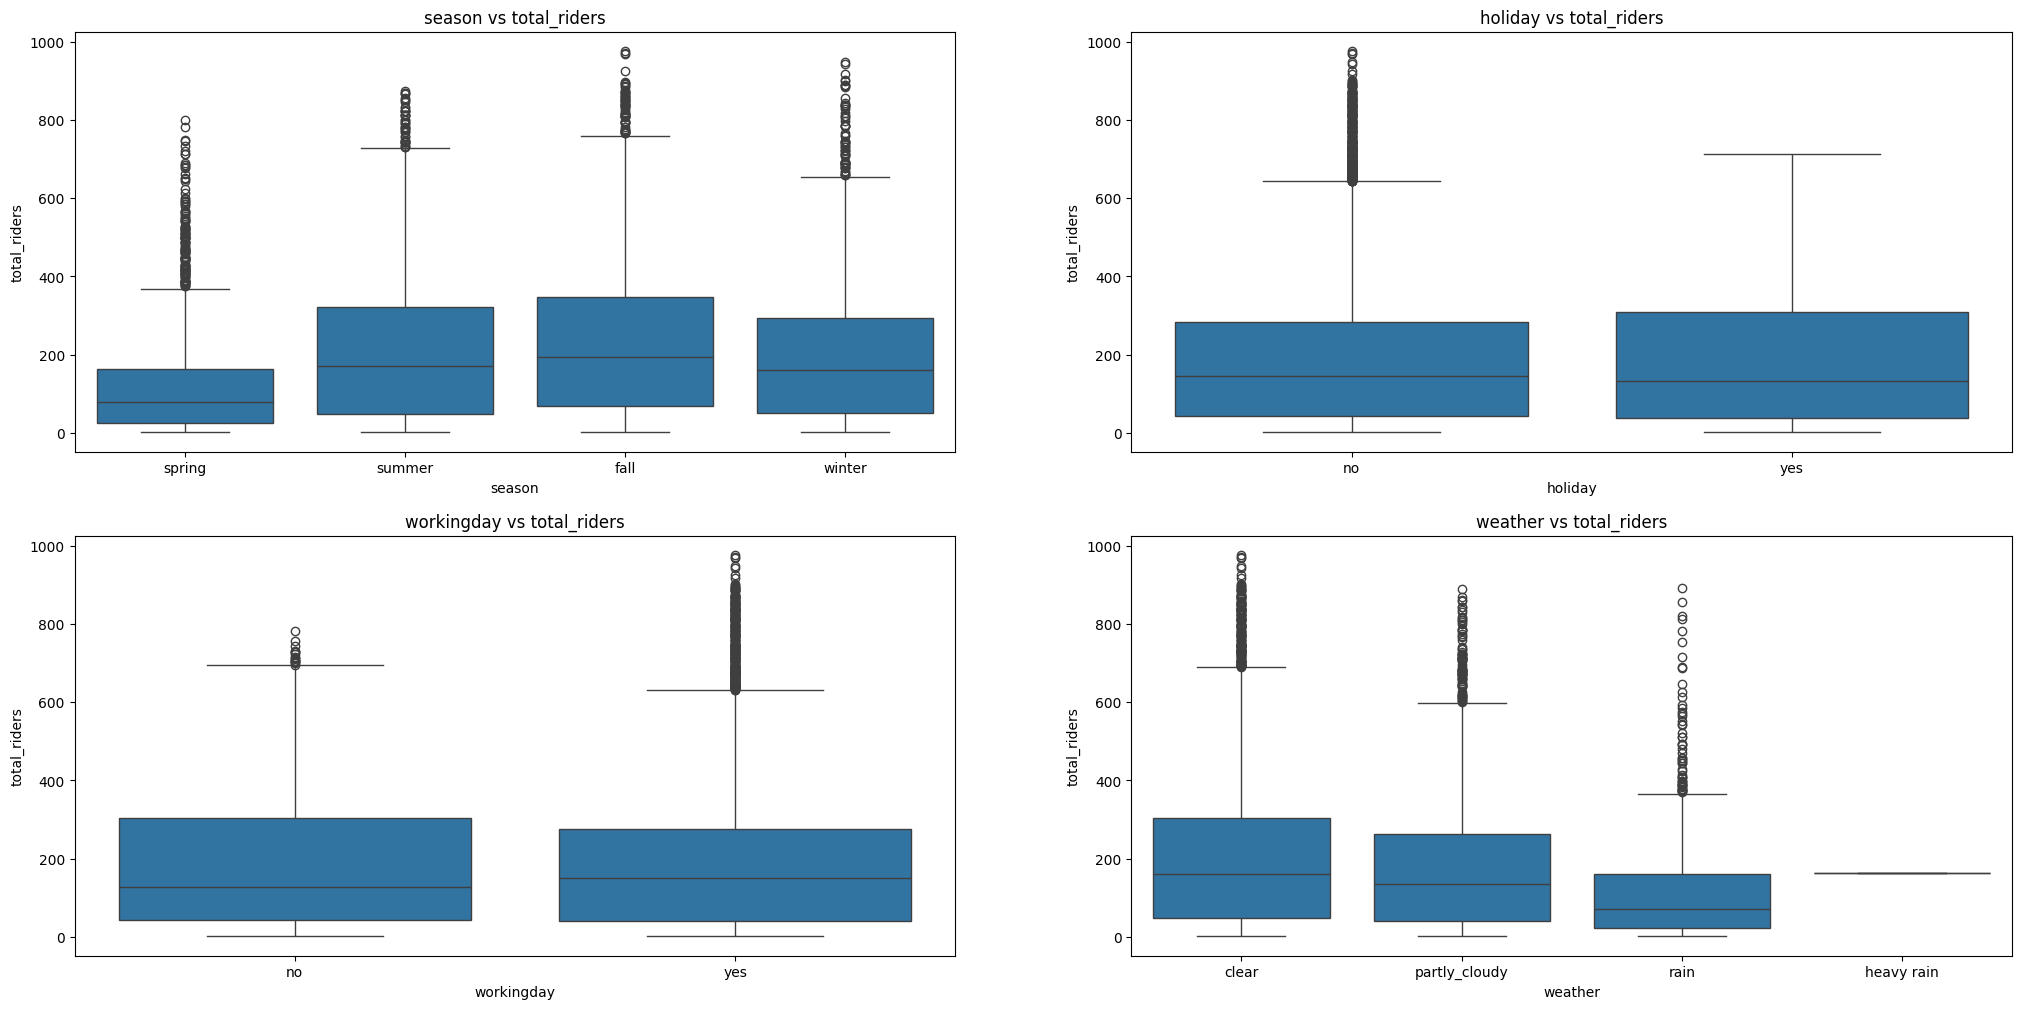

In [26]:
plt.figure(figsize = (25,12))

i = 1
for _ in cat_cols:
  plt.subplot(2,2,i)
  sns.boxplot(data = df, x = df[_], y = 'total_riders')
  plt.title(f'{_} vs total_riders')
  i+=1
plt.show()

###Insights:

  * Highest avg number of bikes were rented during fall season, followed by sumer, winter and spring
  * There are large number of outliers present in the working day data which suggests that there are some days in the week where people rent bikes more than average number
  * Yulu bikes are less rented when the weather is not clear and when it's raining

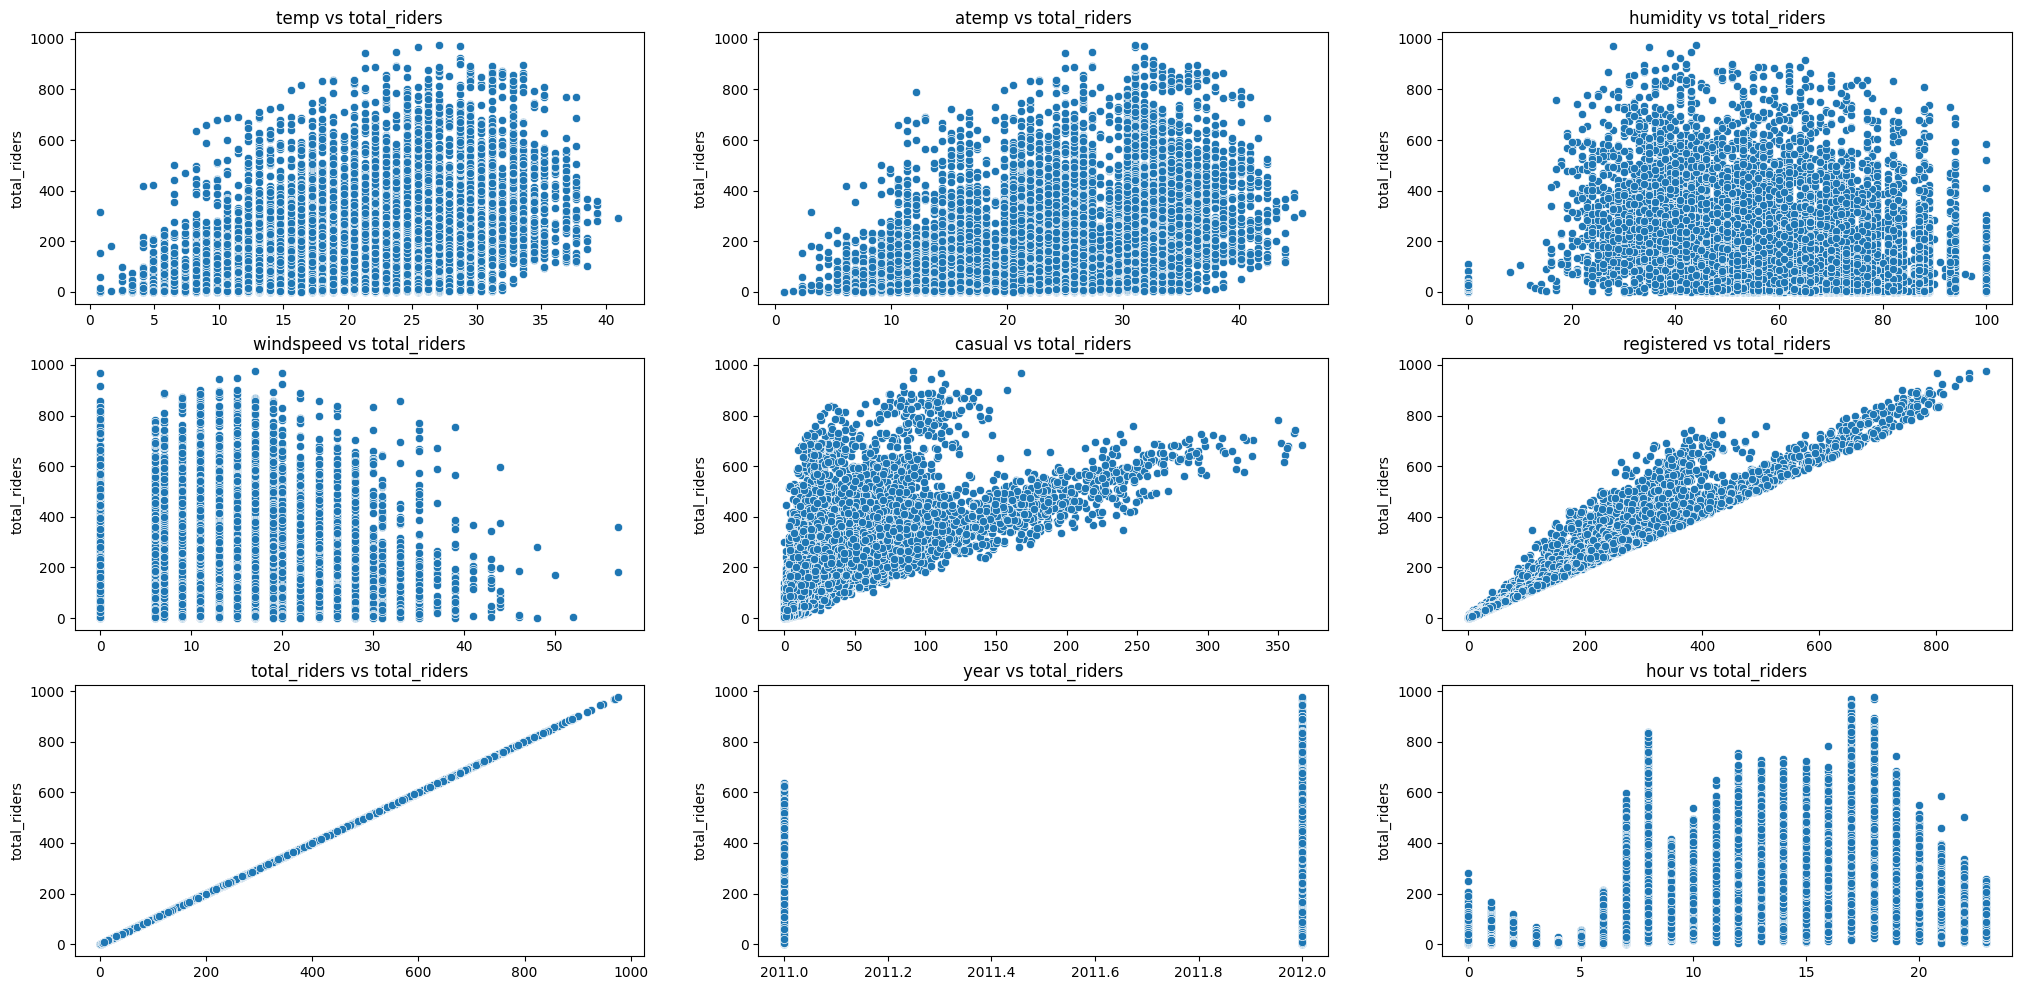

In [27]:
plt.figure(figsize = (25,12))

i = 1
for _ in num_cols:
  plt.subplot(3,3,i)
  sns.scatterplot(data = df, x = df[_], y = 'total_riders')
  plt.title(f'{_} vs total_riders')
  plt.xlabel('')
  i+=1
plt.show()

###Insights:
  * There is a strong positive correlation between registered and total riders which tells that the total riders largely constitutes of registered riders
  * There is some correlation between casual and total riders

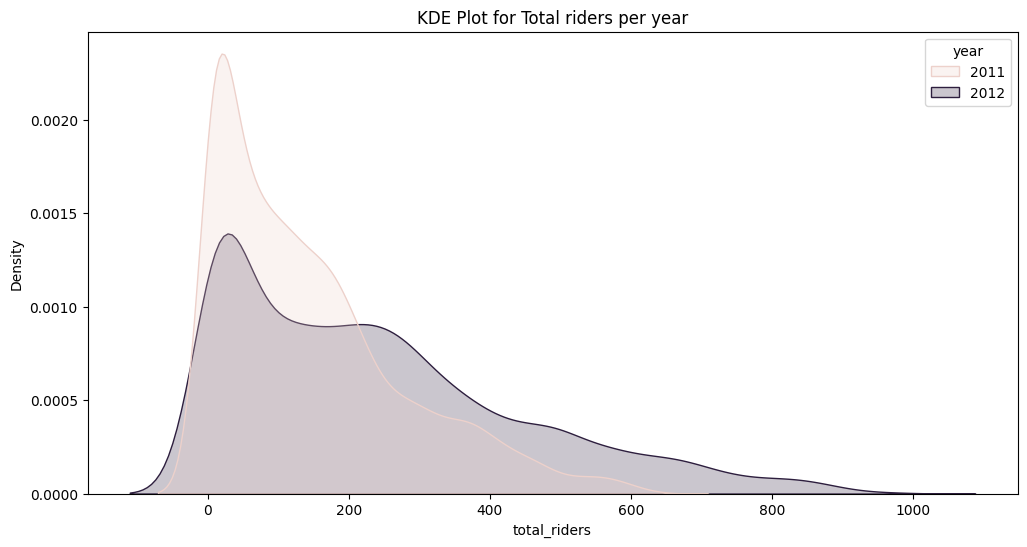

In [28]:
plt.figure(figsize = (12,6))
sns.kdeplot(data = df, x = 'total_riders', hue = 'year', fill = True)
plt.title('KDE Plot for Total riders per year')
plt.show()

Insights:

  * This KDE plot tells us that the data is negatively skewed for both the years which means there will be outliers present in the data as confired above also

#IQR

In [29]:
df_num_cols = df.select_dtypes(include = np.number)
df_num_cols

,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,hour
0,9.84,14.395,81,0.0000,3,13,16,2011,0
1,9.02,13.635,80,0.0000,8,32,40,2011,1
2,9.02,13.635,80,0.0000,5,27,32,2011,2
3,9.84,14.395,75,0.0000,3,10,13,2011,3
4,9.84,14.395,75,0.0000,0,1,1,2011,4
...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,336,2012,19
10882,14.76,17.425,57,15.0013,10,231,241,2012,20
10883,13.94,15.910,61,15.0013,4,164,168,2012,21
10884,13.94,17.425,61,6.0032,12,117,129,2012,22


In [30]:
# obtain the first quartile
Q1 = df_num_cols.quantile(0.25)

# obtain the third quartile
Q3 = df_num_cols.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# print the IQR
print(IQR)

temp             12.3000
atemp            14.3950
humidity         30.0000
windspeed         9.9964
casual           45.0000
registered      186.0000
total_riders    242.0000
year              1.0000
hour             12.0000
dtype: float64


In [31]:
lower_bound = df_num_cols.quantile(0.25) - 1.5 * (df_num_cols.quantile(0.75) - df_num_cols.quantile(0.25))
upper_bound = df_num_cols.quantile(0.75) + 1.5 * (df_num_cols.quantile(0.75) - df_num_cols.quantile(0.25))

# Clip each numerical column using .apply()
df_num_cols = df_num_cols.apply(lambda col: col.clip(lower_bound[col.name], upper_bound[col.name]), axis=0)

df_num_cols.shape


(10886, 9)

In [32]:
# Recalculate IQR for each column after clipping
Q1_after = df_num_cols.quantile(0.25)
Q3_after = df_num_cols.quantile(0.75)
IQR_after = Q3_after - Q1_after

# Calculate new bounds
lower_bound_after = Q1_after - 1.5 * IQR_after
upper_bound_after = Q3_after + 1.5 * IQR_after

# Identify if any values still lie outside the new bounds
outliers = df_num_cols.apply(lambda col: col[(col < lower_bound_after[col.name]) | (col > upper_bound_after[col.name])], axis=0)

# Display the outliers
print(outliers)


Empty DataFrame
Columns: [temp, atemp, humidity, windspeed, casual, registered, total_riders, year, hour]
Index: []


#Hypothesis Testing

Null Hypothesis (H0): The mean number of electric cycles rented is the same on working days and non-working days.

Alternative Hypothesis (H1): The mean number of electric cycles rented is different on working days compared to non-working days.

Assumptions for the Test:

  * The samples are independent.
  * The samples are randomly drawn from the population.
  * The data follows a normal distribution, or the sample size is large enough to apply the Central Limit Theorem.

Test Procedure: Separate the counts of rented cycles into two groups based on whether the day is a working day or not. Perform the 2-sample t-test to compare the means of these two groups. Evaluate the p-value to determine if the result is statistically significant (typically using a significance level of 0.05).

In [33]:
#importing ttest module from scipy library
from scipy.stats import ttest_ind

In [34]:
#Seperate the counts based on working day
working_day_count = df[df['workingday'] == 'yes']['total_riders']
non_working_day_count = df[df['workingday'] == 'no']['total_riders']

# 2 sample t test
t_stat, pval = ttest_ind(working_day_count, non_working_day_count)

t_stat, pval

(1.2096277376026694, 0.22644804226361348)

Interpretation:

Since the p-value (0.226) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This implies that, based on our sample data, there is not enough evidence to conclude that the mean number of electric cycles rented significantly differs between working days and non-working days.

Conclusion:

The test suggests that the status of the day (whether it is a working day or not) does not have a statistically significant impact on the number of electric cycles rented. However, it is important to consider other factors that might interact with the day's status, such as weather, season, or holidays, which could influence this outcome.

#Hypothesis for ANOVA (Weather Conditions):

Null Hypothesis (H0): The mean number of electric cycles rented is the same across different weather conditions.

Alternative Hypothesis (H1): The mean number of electric cycles rented differs across weather conditions.

The Shapiro-Wilk test for normality encountered an issue because one or more weather categories do not have enough data points (at least 3) to perform the test. This situation can arise if certain weather conditions are very rare in the dataset.

Given this limitation, we can still proceed with the ANOVA test for the different weather conditions, keeping in mind the following:

  * The normality assumption may not be fully met for all categories.
  * The ANOVA test is generally robust to violations of normality, especially with large sample sizes.

In [35]:
#importing shapiro, levene, anova from scipy library
from scipy.stats import shapiro, levene, f_oneway
#Seperate the counts based on weather
clear = df[df['weather'] == 'clear']['total_riders']
partly_cloudy = df[df['weather'] == 'partly_cloudy']['total_riders']
rain = df[df['weather'] == 'rain']['total_riders']
heavy_rain = df[df['weather'] == 'heavy rain']['total_riders']

#Levene's Test
levene_test_weather = levene(clear, partly_cloudy, rain, heavy_rain)

#Shapiro's Test
results = {
    'clear': shapiro(clear),
    'partly_cloudy': shapiro(partly_cloudy),
    'rain': shapiro(rain)
}

# Print the results
for key, (statistic, p_value) in results.items():
    normality = 'Likely Normal' if p_value > 0.05 else 'Not Normal'
    print(f"{key}: Statistic = {statistic}, p-value = {p_value}, Normality: {normality}")


#Anova
anova_test_weather = f_oneway(clear, partly_cloudy, rain, heavy_rain)

levene_test_weather, anova_test_weather

clear: Statistic = 0.8909259459740138, p-value = 1.5964921477006555e-57, Normality: Not Normal
partly_cloudy: Statistic = 0.8767694973495206, p-value = 9.777839106111785e-43, Normality: Not Normal
rain: Statistic = 0.7674327906035717, p-value = 3.875893017396149e-33, Normality: Not Normal


(LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35),
 F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42))

Shapiro Wik's Test (Gaussian Check):

The shapiro's test resulted in a p_value of less than 0.05 for all of the variables which is significantly low, This tells that the data is not gaussian


Equal Variance Check (Levene's Test):

The Levene's test resulted in a p-value of approximately 3.504937946833238e-35 , which is significantly low. This suggests that the variances across different weather conditions are not equal.



ANOVA Test: The ANOVA test yielded an F-statistic of approximately 65.53, with a very low p-value (5.482069475935669e-42). This indicates a significant difference in the mean number of cycles rented across different weather conditions.

Conclusion:

  * Despite the assumption of data being not gaussian and equal variance not being met, the ANOVA test indicates significant differences in the mean number of cycles rented across different weather conditions.
  * Given the robustness of ANOVA, especially with large sample sizes, we can confidently conclude that the number of electric cycles rented varies significantly with weather conditions.
  * We reject the null hypothesis (H0) and accept the alternative hypothesis (H1): The mean number of electric cycles rented differs across weather conditions.

#Hypothesis for ANOVA (Season):

Hypothesis: Number of Cycles Rented in Different Seasons

Null Hypothesis (H0): The mean number of electric cycles rented is the same across different seasons.

Alternative Hypothesis (H1): The mean number of electric cycles rented differs across seasons.

In [36]:
from scipy.stats import shapiro, levene, f_oneway
# Check for Normality (Shapiro-Wilk test)
shapiro_test_seasons = {season: shapiro(df[df['season'] == season]['total_riders'])
                        for season in df['season'].cat.categories}

# Check for Equal Variance (Levene's test)
count_by_season = [df[df['season'] == season]['total_riders']
                   for season in df['season'].cat.categories]
levene_test = levene(*count_by_season)

# ANOVA Test (as there are more than two groups - different seasons)
anova_test = f_oneway(*count_by_season)

shapiro_test_seasons, levene_test, anova_test

({'spring': ShapiroResult(statistic=0.8087378401253588, pvalue=8.749584618867662e-49),
  'summer': ShapiroResult(statistic=0.9004818080893252, pvalue=6.039374406270491e-39),
  'fall': ShapiroResult(statistic=0.9148166372899196, pvalue=1.043680518918597e-36),
  'winter': ShapiroResult(statistic=0.8954637482095505, pvalue=1.1299244409282836e-39)},
 LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118),
 F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149))

Normality Check (Shapiro-Wilk Test):

  * For all seasons, the p-values are extremely low (close to 0). This suggests that the data for each season does not follow a normal distribution.
Equal Variance Check (Levene's Test):

  * The p-value is significantly low (practically 0), indicating that the variances across different seasons are not equal.
ANOVA Test:

  * The F-statistic is quite high (236.95), and the p-value is extremely low (close to 0).
  * This result suggests there are significant differences in the mean number of cycles rented across different seasons.

Conclusion:

  * Despite the assumptions of normality and equal variance not being fully met, the ANOVA test strongly indicates that the mean number of cycles rented varies significantly across different seasons.
  * Given the large sample size, the ANOVA test remains robust even if the normality assumption is not strictly met.
  * The conclusion is that we reject the null hypothesis (H0) and accept the  alternative hypothesis (H1): The number of electric cycles rented is different across seasons.

#Chi-Square Test

Hypothesis: to check if weather conditions are significantly different during different seasons.

Null Hypothesis (H0): Weather conditions are independent of the season.

Alternative Hypothesis (H1): Weather conditions are dependent on the season.

Test Procedure:

  * Create a contingency table (cross-tabulation) of weather conditions versus seasons.
  * Perform the Chi-square test of independence on this table.
  * Evaluate the p-value to determine if the result is statistically significant (typically using a significance level of 0.05).

In [37]:
#iporting chi2_contingency from scipy
from scipy.stats import chi2_contingency

#creating contingency tables
contingency_table = pd.crosstab(df['weather'], df['season'])


chi2, pval, dof, expected = chi2_contingency(contingency_table)

chi2, pval, dof, expected

(49.15865559689363,
 1.5499250736864862e-07,
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

Chi-Square Test Results:

  * Chi-Square Statistic: Approximately 49.16
  * P-Value: Approximately 1.549925073686492e-07
  * Degrees of Freedom: 9

Interpretation:

  * The p-value is significantly low (1.549925073686492e-07), far below the typical significance level of 0.05.
  * This result indicates that the observed frequency distribution of weather conditions across different seasons significantly deviates from what would be expected if they were independent.

Recommendations:
  * Seasonal and Weather Considerations: Yulu should consider seasonal and weather variations in their operational and marketing strategies. For example, increasing fleet availability during favorable seasons and weather conditions could boost usage.
  * Focus on Working Days: While working days did not show a significant difference in rentals statistically, operational focus during these days might still be beneficial given the slightly higher usage trends.
  * Data-Driven Decisions: The insights from this analysis should be utilized to make data-driven decisions for resource allocation, marketing campaigns, and strategic planning.
  * Continuous Monitoring: Ongoing analysis of usage patterns, especially in response to changes in weather, urban infrastructure, and customer preferences, is recommended.